defaultdict(<function zero at 0x7f3d36743550>, {'digitalocean': 27, 'ucloud': 3, 'alibaba': 2, 'akamai': 3, 'blackhost': 2, 'eonix': 2, 'mivocloud,': 1, 'cloudvps': 1, 'fcloud': 1, 'telefonica': 1, 'keminet': 1})
digitalocean: 27
Other: 5
ucloud: 3
akamai: 3
alibaba: 2
blackhost: 2
eonix: 2


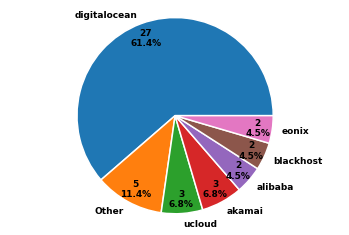

In [41]:
# %load count_cloud_occur.py
from utils.DefaultValue import *
from collections import defaultdict
import os
from rules import get_cloud_list
import matplotlib.pyplot as plt

def zero(): # initialize  dictionary
    return 0
def func(s,d):
  t = int(round(s/100.*sum(d)))     # 透過百分比反推原本的數值
  return f'{t}\n{s:.1f}%'   # 使用文字格式化的方式，顯示內容

#def main(input_folder):
def main():
    input_folder = f'{BASE_PATH}MALICIOUS_IP_INFO'
    cloud_count = defaultdict(zero)

    cloud_list = get_cloud_list.main()
    #cloud_ip_set = set()

    # iterate every file(each file is a ip) in the directory
    for file_name in os.listdir(input_folder):
        f = os.path.join(input_folder, file_name)

        with open(f, 'r') as ip_file:
            # get first line
            first_line = ip_file.readline()
            # check if it has cloud
            if 'cloud' in first_line:
                # Find the line containing keyword related to cloud
                find = 0
                ## iterate each line
                for line in ip_file:
                    ## Iterate through every string related to the cloud and check for its existence
                    for cloud_name in cloud_list:
                        if cloud_name in line.lower():
                            
                            value = line.split(': ')[1] #get string after ': '
                            if '-' in value:
                                value = value.split('-')[0] # Delete everything after '-'
                            if ' ' in value:
                                value = value.split(' ')[0] # Delete everything after ' '
                            if '\n' in value:
                                value = value.split('\n')[0] # Delete everything after '\n'

                            # convert the result to lower case
                            value = value.lower()
                            # increase the occurence of this cloud name by 1
                            cloud_count[value] += 1
                            # set the "find" tag to 1, which indicate we've already found the target
                            find = 1
                            break
                    if find == 1:
                        break
                
    print(cloud_count)
    # set cloud_name with only 1 count
    new_dict = defaultdict(zero)
    for key in cloud_count:
        if cloud_count[key] == 1:
            new_dict['Other'] += 1
        else:
            new_dict[key] = cloud_count[key]


    # store the result in list for sorting
    pair_list = list()
    for key in new_dict:
        count = new_dict[key]

        pair_list.append((f'{key}', count))

    # sort
    pair_list.sort(key = lambda x: x[1], reverse=True) 
    for first, second in pair_list:
        print(f'{first}: {second}')

    # extract tuple of list
    name_list = list()
    count_list = list()
    for pair in pair_list:
        name_list.append(pair[0])
        count_list.append(pair[1])

    plt.pie(count_list, 
            labels=name_list, 
            textprops={'weight':'bold', 'size': 9},
            autopct = lambda i: func(i, count_list),
            pctdistance=0.85,
            wedgeprops={'linewidth':1.5,'edgecolor':'w'})
    plt.axis('equal')
    plt.savefig('cloud_count.png')
    plt.show()
    return name_list, count_list


if __name__ == '__main__':
    main()
